## EDA With Red Wine Data

Data Set Information:

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.  Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.


Attribute Information:

Input variables (based on physicochemical tests):
- 1 - fixed acidity
- 2 - volatile acidity
- 3 - citric acid
- 4 - residual sugar
- 5 - chlorides
- 6 - free sulfur dioxide
- 7 - total sulfur dioxide
- 8 - density
- 9 - pH
- 10 - sulphates
- 11 - alcohol

Output variable (based on sensory data):
- 12 - quality (score between 0 and 10)

In [2]:
import pandas as pd

In [30]:
df=pd.read_csv('winequality-red.csv')

In [4]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [10]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [14]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [15]:
df.corr('spearman')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.278282,0.661708,0.220701,0.250904,-0.175137,-0.088417,0.623071,-0.706674,0.212654,-0.066576,0.114084
volatile acidity,-0.278282,1.000000,-0.610259,0.032386,0.158770,0.021163,0.094110,0.025014,0.233572,-0.325584,-0.224932,-0.380647
citric acid,0.661708,-0.610259,1.000000,0.176417,0.112577,-0.076452,0.009400,0.352285,-0.548026,0.331074,0.096456,0.213481
residual sugar,0.220701,0.032386,0.176417,1.000000,0.212959,0.074618,0.145375,0.422266,-0.089971,0.038332,0.116548,0.032048
chlorides,0.250904,0.158770,0.112577,0.212959,1.000000,0.000805,0.130033,0.411390,-0.234361,0.020825,-0.284504,-0.189922
free sulfur dioxide,-0.175137,0.021163,-0.076452,0.074618,0.000805,1.000000,0.789698,-0.041178,0.115679,0.045862,-0.081367,-0.056901
total sulfur dioxide,-0.088417,0.094110,0.009400,0.145375,0.130033,0.789698,1.000000,0.129332,-0.009841,-0.000504,-0.257806,-0.196735
density,0.623071,0.025014,0.352285,0.422266,0.411390,-0.041178,0.129332,1.000000,-0.312055,0.161478,-0.462445,-0.177074
pH,-0.706674,0.233572,-0.548026,-0.089971,-0.234361,0.115679,-0.009841,-0.312055,1.000000,-0.080306,0.179932,-0.043672
sulphates,0.212654,-0.325584,0.331074,0.038332,0.020825,0.045862,-0.000504,0.161478,-0.080306,1.000000,0.207330,0.377060


In [16]:
df[df['quality']==max(df['quality'])]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
267,7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.99730,3.35,0.86,12.8,8
278,10.3,0.32,0.45,6.4,0.073,5.0,13.0,0.99760,3.23,0.82,12.6,8
390,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,8
440,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.99870,2.88,0.82,9.8,8
455,11.3,0.62,0.67,5.2,0.086,6.0,19.0,0.99880,3.22,0.69,13.4,8
481,9.4,0.30,0.56,2.8,0.080,6.0,17.0,0.99640,3.15,0.92,11.7,8
495,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
498,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8
828,7.8,0.57,0.09,2.3,0.065,34.0,45.0,0.99417,3.46,0.74,12.7,8


In [17]:
df[df['quality']==min(df['quality'])]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
459,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.00,3
517,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.40,3
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.70,3
832,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.90,3
899,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.00,3
1299,7.6,1.580,0.00,2.10,0.137,5.0,9.0,0.99476,3.50,0.40,10.90,3
1374,6.8,0.815,0.00,1.20,0.267,16.0,29.0,0.99471,3.32,0.51,9.80,3
1469,7.3,0.980,0.05,2.10,0.061,20.0,49.0,0.99705,3.31,0.55,9.70,3
1478,7.1,0.875,0.05,5.70,0.082,3.0,14.0,0.99808,3.40,0.52,10.20,3
1505,6.7,0.760,0.02,1.80,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3


In [19]:
df.shape

(1599, 12)

In [20]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [35]:
#Remove Duplicaate Records
df=df.drop_duplicates()

In [36]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [37]:
df.shape

(1359, 12)

In [39]:
df.corr('spearman')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.280162,0.657387,0.222396,0.244095,-0.157857,-0.083827,0.626628,-0.708560,0.220696,-0.062696,0.111693
volatile acidity,-0.280162,1.000000,-0.610925,0.031299,0.170678,0.012162,0.092548,0.032264,0.245973,-0.324207,-0.225714,-0.387450
citric acid,0.657387,-0.610925,1.000000,0.170096,0.110679,-0.059585,0.021124,0.344303,-0.558594,0.341512,0.090798,0.219427
residual sugar,0.222396,0.031299,0.170096,1.000000,0.215528,0.077652,0.141515,0.414489,-0.091543,0.029702,0.112205,0.025749
chlorides,0.244095,0.170678,0.110679,0.215528,1.000000,0.010096,0.141324,0.420550,-0.234452,0.033630,-0.301525,-0.204360
free sulfur dioxide,-0.157857,0.012162,-0.059585,0.077652,0.010096,1.000000,0.789881,-0.025635,0.090857,0.041320,-0.099386,-0.058746
total sulfur dioxide,-0.083827,0.092548,0.021124,0.141515,0.141324,0.789881,1.000000,0.137455,-0.029526,-0.008333,-0.275353,-0.196620
density,0.626628,0.032264,0.344303,0.414489,0.420550,-0.025635,0.137455,1.000000,-0.322763,0.157787,-0.470019,-0.184302
pH,-0.708560,0.245973,-0.558594,-0.091543,-0.234452,0.090857,-0.029526,-0.322763,1.000000,-0.100048,0.183005,-0.042738
sulphates,0.220696,-0.324207,0.341512,0.029702,0.033630,0.041320,-0.008333,0.157787,-0.100048,1.000000,0.207636,0.380581


In [40]:
import seaborn as sns

<AxesSubplot: >

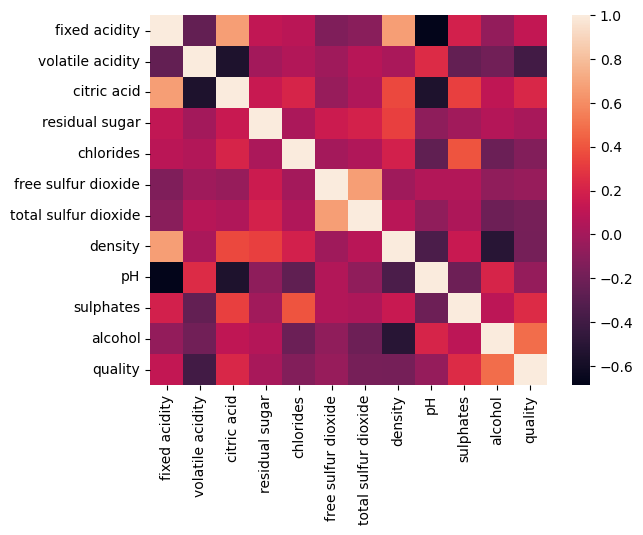

In [42]:
sns.heatmap(df.corr())

<AxesSubplot: >

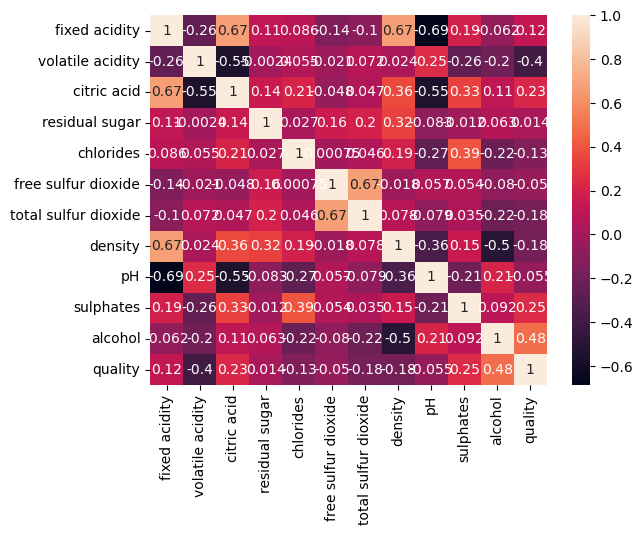

In [43]:
sns.heatmap(df.corr(),annot=True)

In [44]:
import matplotlib.pyplot as plt

<AxesSubplot: >

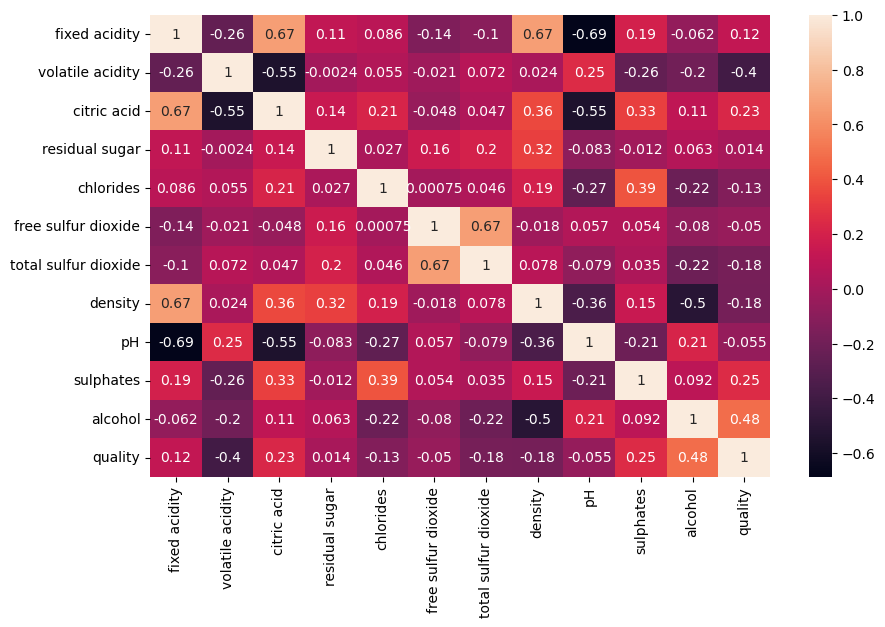

In [47]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

In [48]:
df.quality.value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

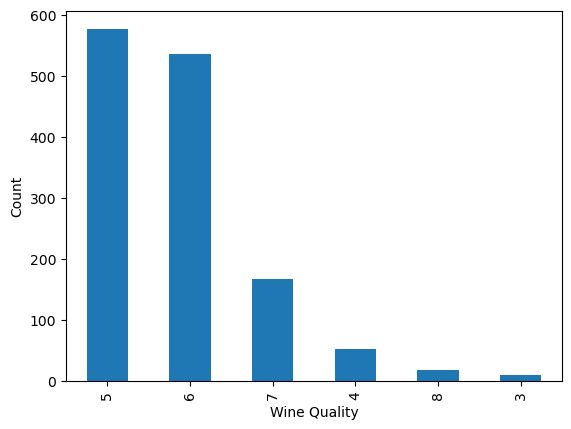

In [55]:
#Conclusion: It is an imbalance dataset
df.quality.value_counts().plot(kind='bar')
plt.xlabel('Wine Quality')
plt.ylabel('Count')
plt.show()

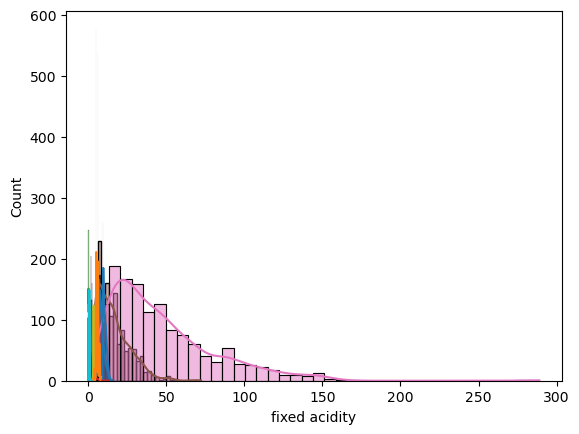

In [60]:
for col in df.columns:
    sns.histplot(df[col],kde=True)
    

<AxesSubplot: xlabel='alcohol', ylabel='Count'>

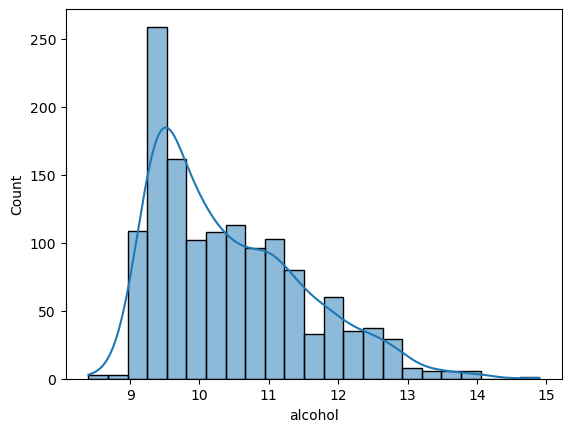

In [61]:
sns.histplot(df['alcohol'],kde=True)

In [ ]:
sns.pairplot(df)

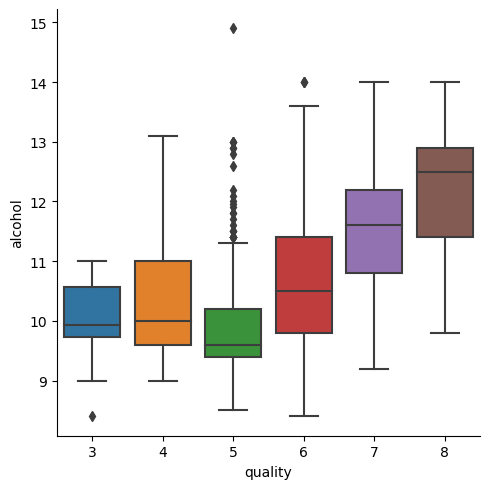

In [68]:
sns.catplot(x='quality',y='alcohol',data=df,kind='box')

In [ ]:
sns.scatterplot(x='alcohol',y='pH',hue='quality',data=df)